In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report 
df = pd.read_csv("diabetes.csv")
df["Outcome"].value_counts()
 

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis = 1)
Y = df['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42)

In [41]:
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)

model = tree.DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 1, random_state = 42, min_samples_split = 6)





In [42]:
model = model.fit(X_resampled, y_resampled)
Y_pred = model.predict(X_test)

In [43]:
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.84      0.65      0.73       151
           1       0.54      0.76      0.63        80

    accuracy                           0.69       231
   macro avg       0.69      0.71      0.68       231
weighted avg       0.73      0.69      0.70       231



In [44]:
print(model.score(X_test,Y_test))

0.6883116883116883


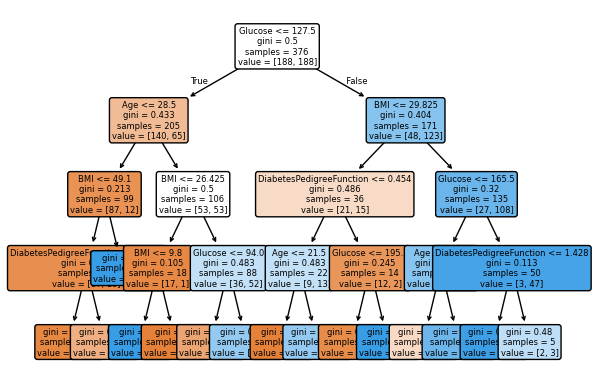

<Figure size 640x480 with 0 Axes>

In [45]:
tree.plot_tree(model, feature_names=list(X.columns),
                                         filled=True, fontsize = 6, rounded=True)
plt.show()
plt.savefig("%%SVG")

In [46]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
X = df.drop('Outcome', axis = 1)
Y = df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42)
steps = [('pca', PCA(n_components=6)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.774 (0.056)


With my Dimensionality Reduction Algorithim I increaced my accuracy score through PCA becuase I reduced the number of components and less input dimensions

In [47]:
def thing():
    i = 0    
    dict = [{'name': 'Niles'},{'name': 'C.C.'}, {'name': 'Fran'}]
    for v in dict:
        length=len(dict)
        names = v.values()
        last_item = str(dict[-1].values()).replace("dict_values([","").replace("])","")
        names = str(names).replace("dict_values([","").replace("])","")
        if names != last_item:
            names = names + ", "
            print(names)
        else:
            names = "&" + names 
            print(names)
thing()

'Niles', 
'C.C.', 
&'Fran'
